In [1]:
import pandas as pd
import os
import numpy as np
import sqlite3 as sq
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data from the CSV file 'SBAnational.csv' into a DataFrame named 'df'
df=pd.read_csv('SBAnational.csv')

C:\Users\Sathwik\AppData\Local\Temp\ipykernel_22176\1909320446.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('SBAnational.csv')


In [3]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [5]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [6]:
df.head(40)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,1997,...,N,N,NaN,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,UNION,NJ,7083,WELLS FARGO BANK NATL ASSOC,SD,0,2-Jun-80,1980,...,N,N,24-Jun-91,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,1997,...,N,Y,NaN,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,PORT SAINT JOE,FL,32456,CENTENNIAL BANK,FL,721310,28-Feb-97,1997,...,N,N,NaN,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,GLASTONBURY,CT,6073,WEBSTER BANK NATL ASSOC,CT,0,28-Feb-97,1997,...,N,Y,NaN,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [7]:
resultset=set()
result_bank=set()
#Created a tab separated value from which the data is parsed to database.
with open('svtsv.txt') as f:
    temp=f.readlines()
    for i,k in enumerate(temp):
        if i==0:
            continue
        j=k.split('\t')
        city=j[2]
        State=j[3]
        zzip=j[4]
        result_bank.add((j[5].strip('"'),j[6]))
        resultset.add((city,State,zzip))

In [8]:
database_file = 'FinalProject'

# Check if the file exists before attempting to delete
if os.path.exists(database_file):
    os.remove(database_file)
    print(f"The database file '{database_file}' has been deleted.")
else:
    print(f"The database file '{database_file}' does not exist.")


The database file 'FinalProject' does not exist.


In [9]:
# Establish a connection to the SQLite database named 'FinalProject'
conn=sq.connect('FinalProject')

# DETAILS OF THE NORMALIZED DATABASE

The Database is built as per normalization criteria given by 1NF, 2NF and 3NF. 

Four tables are created as follows:

1. CITY TABLE
    CITYID INTEGER PRIMARY KEY
    CITYNAME TEXT NOT NULL
    STATE TEXT NOT NULL
    ZIP INTEGER NOT NULL

2. BANK TABLE
    BANKID INTEGER PRIMARY KEY
    BANKNAME TEXT NOT NULL
    BANKSTATE TEXT NOT NULL

3. NAICS TABLE
    ID INTEGER PRIMARY KEY
    SECTOR INTEGER NOT NULL
    DESCRIPTION TEXT NOT NULL

4. LOAN_DETAILS TABLE
    LOANNUMBER DOUBLE PRIMARY KEY
    CUSTOMER_NAME TEXT NOT NULL
    CITYID INTEGER NOT NULL FOREIGN KEY TO CITY TABLE
    BANKID INTEGER NOT NULL FOREIGN KEY TO BANK TABLE
    NAICS TEXT NOT NULL FOREIGN KEY TO NAICS TABLE
    APPROVALDATE DATE
    TERM INTEGER NOT NULL
    NOEMP INTEGER
    NEWEXIST INTEGER
    CREATEJOB INTEGER
    RETAINEDJOB INTEGER
    FRANCHISECODE INTEGER
    URBANRURAL INTEGER
    REVLINECR TEXT
    LOWDOC TEXT NOT NULL
    DISBURSEMENTDATE DATE
    DISBURSEMENTGROSS DOUBLE
    MIS_STATUS TEXT
    GRAPPV DOUBLE
    SBA_APPV DOUBLE

# CITY TABLE

In [10]:
# Using the established database connection ('conn')
with conn:
    # Create a cursor object to execute SQL commands
    cursor=conn.cursor()
    # Drop the 'CITY' table if it exists
    cursor.execute('DROP TABLE IF EXISTS CITY;')
    # Define the SQL command to create the 'CITY' table with specified columns
    create_table='''CREATE TABLE IF NOT EXISTS CITY(CITYID INTEGER PRIMARY KEY AUTOINCREMENT,
    CITYNAME TEXT NOT NULL,
    STATE TEXT NOT NULL,
    ZIP INTEGER NOT NULL)'''
    # Execute the SQL command to create the 'CITY' table
    cursor.execute(create_table)
    # Retrieve information about the columns in the 'CITY' table using PRAGMA
    col=cursor.execute("PRAGMA table_info('CITY')")

In [11]:
# Define the SQL command for inserting multiple rows into the 'CITY' table
ins='''INSERT INTO CITY(CITYNAME,STATE,ZIP) VALUES(?,?,?)'''
# Using the established database connection ('conn')
with conn:
    # Create a cursor object to execute SQL commands
    cursor=conn.cursor()
    # Execute the SQL command 'INSERT INTO CITY...' for multiple rows using 'executemany'
    # The data to be inserted is provided in the 'resultset' variable
    cursor.executemany(ins,resultset)

# BANK TABLE

In [12]:
with conn:
    cursor=conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS BANK;')
    cursor=conn.cursor()
    create_table='''CREATE TABLE IF NOT EXISTS BANK(BANKID INTEGER PRIMARY KEY AUTOINCREMENT,
    BANKNAME TEXT NOT NULL,
    BANKSTATE TEXT NOT NULL)'''
    cursor.execute(create_table)
    col=cursor.execute("PRAGMA table_info('BANK')")

In [13]:
ins='''INSERT INTO BANK(BANKNAME,BANKSTATE) VALUES(?,?)'''
with conn:
    cursor=conn.cursor()
    cursor.executemany(ins,result_bank)

# NAICS Data table 

In [14]:
# Dictionary mapping NAICS (North American Industry Classification System) codes to industry descriptions
datalookupnaics={11:' Agriculture, forestry, fishing and hunting',
 21:'Mining, quarrying, and oil and gas extraction',
 22:'Utilities', 23:'Construction', 
 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
 42:'Wholesale trade',
 44:'Retail trade',45:'Retail trade',
 48:'Transportation and warehousing',49:'Transportation and warehousing',
 51:'Information',
 52:'Finance and Insurance',
 53:'Real estate and rental and leasing',
 54:'Professional, scientific, and technical services',
 55:'Management of companies and enterprises',
 56:'Administrative and support and waste management and remediation services',
 61: 'Educational services',
 62:'Health care and social assistance',
 71:'Arts, entertainment, and recreation',
 72:'Accommodation and food services',
 81:'Other services',
 92:'Public administarion'}

In [15]:
with conn:
    cursor=conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS NAICS;')
    create_table='''CREATE TABLE IF NOT EXISTS NAICS(ID INTEGER PRIMARY KEY AUTOINCREMENT,
    sector integer NOT NULL,
    Description TEXT NOT NULL)'''
    cursor.execute(create_table)
    col=cursor.execute("PRAGMA table_info('NAICS')")

In [16]:
# Create a list of tuples containing NAICS codes and their corresponding descriptions
result_naics=[(i,datalookupnaics[i]) for i in datalookupnaics.keys()]
ins='''INSERT INTO NAICS(sector,Description) VALUES(?,?)'''
with conn:
    cursor=conn.cursor()
    cursor.executemany(ins,result_naics)

## get bank dictionary

In [17]:
# Initialize an empty dictionary to store bank information
bank_dict={}

with conn:
    cur=conn.cursor()
    # Iterate over the rows retrieved from the 'BANK' table using a SELECT query
    for row in cur.execute("SELECT * FROM BANK"):
        # Add a key-value pair to the dictionary, where the bank name is the key and the bank ID is the value
        bank_dict[row[1]]=row[0]

In [18]:
bank_dict

{'SOUTH CENT. KANSAS ECONOMIC DE': 1,
 'TOTALBANK': 2,
 'THE JEFFERSON BANK': 3,
 'PACIFIC WEST BANK': 4,
 'THE BANK OF SOUTH CAROLINA': 5,
 'SUGAR RIVER BANK': 6,
 'HOPEWELL VALLEY COMMUNITY BANK': 7,
 'CFCU COMMUNITY CU': 8,
 'RICHLAND STATE BANK': 3299,
 'GREEN BELT BANK & TRUST': 10,
 'MIDWEST REGIONAL BANK': 11,
 'FIRST HOME BANK': 4747,
 'UNITED ORIENT BANK': 13,
 'FIRST STAR BANK, S.S.B.': 14,
 'ENNIS STATE BANK': 15,
 'FIRST FINANCIAL BANK': 6945,
 'PREMIER BANK': 5701,
 'MUTUAL OF OMAHA BANK': 6988,
 'ARVIN DEVELOPMENT CORPORATION': 19,
 'BANK REALE': 20,
 'WELLS FARGO BANK NATL ASSOC': 7172,
 'SILVERGATE BANK': 22,
 'FARMERS & MERCHANTS BK OF SO.': 23,
 'LIBERTY BANK': 4252,
 'LANGLEY CORP': 25,
 'SCB BANK': 26,
 'WOOD & HUSTON BANK': 27,
 'COPIAH BANK NATL ASSOC': 28,
 'THE MINERS STATE BANK': 29,
 'STATE OF FRANKLIN BANCSHARES': 30,
 'FIRST NATIONAL BANK': 6334,
 'MONTEREY COUNTY BANK': 32,
 'TALERIS CU INC': 33,
 'UNION BANK': 3212,
 'SQUARE 1 BANK': 35,
 '1ST BANK': 36,
 

## get city_dict

In [19]:
# Initialize an empty dictionary to store city information
city_dict={}

with conn:
    cur=conn.cursor()
    # Iterate over the rows retrieved from the 'city' table using a SELECT query
    for row in cur.execute("SELECT * FROM city"):
        # Add a key-value pair to the dictionary, where the city name is the key and the city ID is the value
        city_dict[row[1]]=row[0]

# Loan Details

In [20]:
result_loan_details=set()
with open('svtsv.txt') as f:
    temp=f.readlines()
    for i,k in enumerate(temp):
        if i==0:
            continue
        j=k.split('\t')
        Loannumber=j[0]
        customer_name = j[1].strip('"')
        cityid=city_dict[j[2]]
        bankid=bank_dict[j[5].strip('"')]
        naics=j[7]
        ApprovalDate=j[8]
        term=j[10]
        NoEmp=j[11]
        NewExist=j[12]
        CreateJob=j[13]
        RetainedJob=j[14]
        FranchiseCode=j[15]
        UrbanRural=j[16]
        RevLineCr=j[17]
        LowDoc=j[18]
        DisbursementDate=j[20]
        DisbursementGross=j[21].strip('"').lstrip('$').rstrip()
        MIS_Status=j[23]
        GrAppv=j[25].strip('"').lstrip('$').rstrip()
        SBA_Appv=j[26].strip('"').lstrip('$').rstrip(' "').rstrip()
        
        result_loan_details.add((Loannumber,customer_name,cityid, bankid, naics, ApprovalDate,term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status, GrAppv,SBA_Appv))


In [21]:
with conn:
    cursor=conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS LOAN_DETAILS;')
    create_table='''
    CREATE TABLE IF NOT EXISTS LOAN_DETAILS(LOANNUMBER DOUBLE PRIMARY KEY,
    CUSTOMER_NAME TEXT NOT NULL,
    CITYID INTEGER NOT NULL,
    BANKID INTEGER NOT NULL,
    NAICS TEXT NOT NULL,
    APPROVALDATE DATE,
    TERM INTEGER NOT NULL,
    NOEMP INTEGER,
    NEWEXIST INTEGER,
    CREATEJOB INTEGER,
    RETAINEDJOB INTEGER,
    FRANCHISECODE INTEGER,
    URBANRURAL INTEGER,
    REVLINECR TEXT,   
    LOWDOC TEXT NOT NULL,
    DISBURSEMENTDATE DATE,
    DISBURSEMENTGROSS DOUBLE,
    MIS_STATUS TEXT,
    GRAPPV DOUBLE,
    SBA_APPV DOUBLE,
    FOREIGN KEY(cityid) REFERENCES CITY(CITYID),
    FOREIGN KEY(bankid) REFERENCES BANK(BANKID),
    FOREIGN KEY(naics) REFERENCES NAICS(ID)
    )'''
    cursor.execute(create_table)
    col=cursor.execute("PRAGMA table_info('LOAN_DETAILS')")

In [22]:
col.fetchall()

[(0, 'LOANNUMBER', 'DOUBLE', 0, None, 1),
 (1, 'CUSTOMER_NAME', 'TEXT', 1, None, 0),
 (2, 'CITYID', 'INTEGER', 1, None, 0),
 (3, 'BANKID', 'INTEGER', 1, None, 0),
 (4, 'NAICS', 'TEXT', 1, None, 0),
 (5, 'APPROVALDATE', 'DATE', 0, None, 0),
 (6, 'TERM', 'INTEGER', 1, None, 0),
 (7, 'NOEMP', 'INTEGER', 0, None, 0),
 (8, 'NEWEXIST', 'INTEGER', 0, None, 0),
 (9, 'CREATEJOB', 'INTEGER', 0, None, 0),
 (10, 'RETAINEDJOB', 'INTEGER', 0, None, 0),
 (11, 'FRANCHISECODE', 'INTEGER', 0, None, 0),
 (12, 'URBANRURAL', 'INTEGER', 0, None, 0),
 (13, 'REVLINECR', 'TEXT', 0, None, 0),
 (14, 'LOWDOC', 'TEXT', 1, None, 0),
 (15, 'DISBURSEMENTDATE', 'DATE', 0, None, 0),
 (16, 'DISBURSEMENTGROSS', 'DOUBLE', 0, None, 0),
 (17, 'MIS_STATUS', 'TEXT', 0, None, 0),
 (18, 'GRAPPV', 'DOUBLE', 0, None, 0),
 (19, 'SBA_APPV', 'DOUBLE', 0, None, 0)]

In [23]:
ins='''INSERT INTO  LOAN_DETAILS(LOANNUMBER,customer_name,cityid,bankid,naics,ApprovalDate,term,NOEMP,NEWEXIST,CREATEJOB,RETAINEDJOB,FRANCHISECODE,URBANRURAL,REVLINECR,LOWDOC,DISBURSEMENTDATE,DISBURSEMENTGROSS,MIS_STATUS,GRAPPV, SBA_APPV) VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'''
with conn:
    cursor=conn.cursor()
    cursor.executemany(ins,result_loan_details)

In [24]:
# SQL query to select specific columns from three tables (LOAN_DETAILS, CITY, BANK) using a JOIN operation
sql='''
SELECT
    L.LOANNUMBER, L.CUSTOMER_NAME, L.CITYID, L.BANKID, L.NAICS, L.APPROVALDATE, L.TERM, L.NOEMP,
    L.NEWEXIST, L.CREATEJOB, L.RETAINEDJOB, L.FRANCHISECODE, L.URBANRURAL, L.REVLINECR, L.LOWDOC,
    L.DISBURSEMENTDATE, L.DISBURSEMENTGROSS, L.MIS_STATUS, L.GRAPPV, L.SBA_APPV, C.CITYID,
    B.BANKID, B.BANKSTATE
FROM
    LOAN_DETAILS L
JOIN
    CITY C ON L.cityid = C.CITYID
JOIN
    BANK B ON L.bankid = B.BANKID;
 
'''
# Use pandas to execute the SQL query and load the result into a DataFrame
df = pd.read_sql_query(sql, conn)
# Display the first few rows of the DataFrame
df.head()

,LOANNUMBER,CUSTOMER_NAME,CITYID,BANKID,NAICS,APPROVALDATE,TERM,NOEMP,NEWEXIST,CREATEJOB,...,REVLINECR,LOWDOC,DISBURSEMENTDATE,DISBURSEMENTGROSS,MIS_STATUS,GRAPPV,SBA_APPV,CITYID,BANKID,BANKSTATE
0,1.251905e+09,"Chestnut Investment Group, Inc",33294,5265,523999,31-Mar-05,60,4,1,2,...,Y,N,31-Dec-05,"116,974.00",P I F,"50,000.00","25,000.00 """,33294,5265,DE
1,3.003355e+09,RE3 Properties LLC,46688,6821,531210,17-Mar-08,84,4,2,0,...,Y,N,31-Mar-08,"10,000.00",P I F,"10,000.00","5,000.00 """,46688,6821,NC
2,3.774414e+09,R L HAMILTON CARPETS INC,82569,7159,235520,05-Jun-00,36,10,1,0,...,0,N,30-Jun-00,"25,000.00",P I F,"25,000.00","20,000.00 """,82569,7159,CA
3,1.339605e+09,Red Vest Pizza Inc.,79758,6821,722110,15-Jun-05,47,4,1,0,...,T,N,30-Jun-05,"44,900.00",CHGOFF,"30,000.00","15,000.00 """,79758,6821,NC
4,4.283364e+09,DRYCLEANING PLUS,79305,6772,812320,07-Feb-01,42,4,1,0,...,0,N,31-Mar-01,"21,258.00",P I F,"31,000.00","15,500.00 """,79305,6772,IN


In [25]:
sql='''
SELECT
    n.sector SectorID,
    N.Description Sector,
    COUNT(CASE WHEN L.MIS_STATUS = 'CHGOFF' THEN 1 END) AS CHG_OFF_Count,
    ROUND((COUNT(CASE WHEN L.MIS_STATUS = 'CHGOFF' THEN 1 END) * 100.0) / COUNT(L.MIS_STATUS),2) AS CHG_OFF_Percentage
FROM
    NAICS N
JOIN
    LOAN_DETAILS L ON N.sector = SUBSTRING(L.NAICS, 1, 2)
WHERE
    L.naics <> '0'
GROUP BY
    N.SECTOR
ORDER BY CHG_OFF_Percentage DESC;'''
# Use pandas to execute the SQL query and load the result into a DataFrame
df1 = pd.read_sql_query(sql, conn)
# Display the first few rows of the DataFrame
df1

,SectorID,Sector,CHG_OFF_Count,CHG_OFF_Percentage
0,53,Real estate and rental and leasing,3904,28.64
1,52,Finance and Insurance,2692,28.35
2,48,Transportation and warehousing,5431,26.74
3,51,Information,2821,24.79
4,61,Educational services,1552,24.16
5,56,Administrative and support and waste managemen...,7661,23.44
6,45,Retail trade,9930,23.36
7,23,Construction,15463,23.20
8,49,Transportation and warehousing,508,22.87
9,44,Retail trade,18938,22.35


<Axes: xlabel='SectorID', ylabel='CHG_OFF_Percentage'>

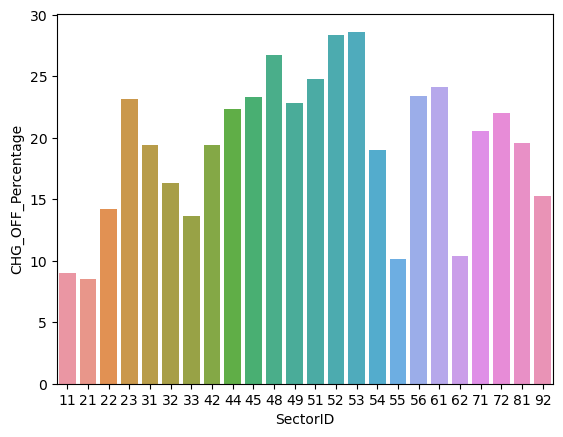

In [26]:
sns.barplot(x='SectorID', y='CHG_OFF_Percentage', data=df1)

Based on the graph, it is evident that sectors 52 and 53 have a higher likelihood of loan default, while sectors 11 and 21 demonstrate a higher rate of customers successfully repaying their loan amounts in full.

<Axes: xlabel='SectorID', ylabel='count'>

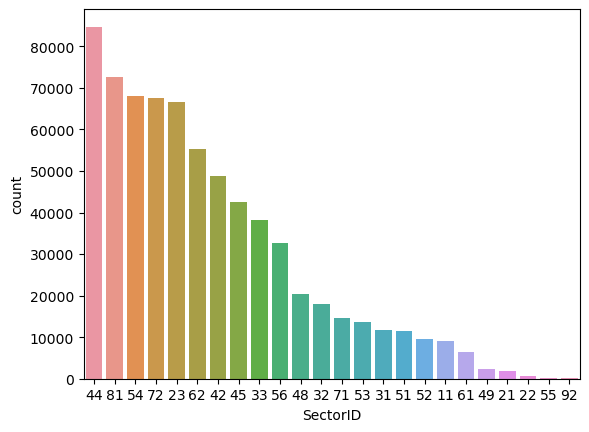

In [27]:
sql='''
SELECT
    COUNT(LOANNUMBER) AS count,
    SUBSTRING(NAICS, 1, 2) AS SectorID
FROM
    LOAN_DETAILS
WHERE
    naics <> '0'
GROUP BY
    SUBSTRING(NAICS, 1, 2)
ORDER BY count DESC;
'''
# Use pandas to execute the SQL query and load the result into a DataFrame
df1 = pd.read_sql_query(sql, conn)
# Display the first few rows of the DataFrame
sns.barplot(x='SectorID', y='count', data=df1)

The graph provides an overview of the number of loan applications within each specific sector.

In [28]:
# Commit changes to the database to persist the modifications
conn.commit()
# Close the database connection to release resources
conn.close()

In [29]:
# Drop rows with missing values in any column from the DataFrame
df=df.dropna()

# Convert the 'SBA_APPV' column to numeric, removing commas and stripping extra characters
df['SBA_APPV'] = pd.to_numeric(df['SBA_APPV'].str.replace(',', '').str.strip(' "'), errors='coerce')

# Convert the 'GRAPPV' column to numeric, removing commas and handling errors by coercing to NaN
df['GRAPPV'] = pd.to_numeric(df['GRAPPV'].str.replace(',', ''), errors='coerce')

# Convert the 'DISBURSEMENTGROSS' column to numeric, removing commas and handling errors by coercing to NaN
df['DISBURSEMENTGROSS'] = pd.to_numeric(df['DISBURSEMENTGROSS'].str.replace(',', ''), errors='coerce')

# Convert the 'NEWEXIST' column to numeric
df['NEWEXIST']=pd.to_numeric(df['NEWEXIST'])

# Calculate the 'PORTION' column as the ratio of 'SBA_APPV' to 'GRAPPV'
df['PORTION'] = df['SBA_APPV'] / df['GRAPPV']

# Convert 'DISBURSEMENTDATE' and 'APPROVALDATE' columns to datetime format, handling errors by coercing to NaT
df['DISBURSEMENTDATE'] = pd.to_datetime(df['DISBURSEMENTDATE'], errors='coerce')
df['APPROVALDATE'] = pd.to_datetime(df['APPROVALDATE'], errors='coerce')

# Display the data types of each column in the DataFrame
df.dtypes

LOANNUMBER                  float64
CUSTOMER_NAME                object
CITYID                        int64
BANKID                        int64
NAICS                        object
APPROVALDATE         datetime64[ns]
TERM                          int64
NOEMP                         int64
NEWEXIST                    float64
CREATEJOB                     int64
RETAINEDJOB                   int64
FRANCHISECODE                 int64
URBANRURAL                    int64
REVLINECR                    object
LOWDOC                       object
DISBURSEMENTDATE     datetime64[ns]
DISBURSEMENTGROSS           float64
MIS_STATUS                   object
GRAPPV                      float64
SBA_APPV                    float64
CITYID                        int64
BANKID                        int64
BANKSTATE                    object
PORTION                     float64
dtype: object

In [30]:
# Define the start and end dates of the recession period
recession_start = pd.to_datetime('2007-12-01')
recession_end = pd.to_datetime('2009-06-30')

# Create the 'RECESSION' column based on whether the disbursement date falls within the recession period
df['RECESSION'] = ((df['DISBURSEMENTDATE'] >= recession_start) & (df['DISBURSEMENTDATE'] <= recession_end)).astype(int)

# Create the 'REALESTATE' column based on the term of the loan (240 months or more)
df['REALESTATE'] = np.where(df['TERM'] >= 240, 1, 0)

# Create the 'DEFAULT' column based on whether the MIS status is not 'P I F' (Paid In Full)
df['DEFAULT'] = (df['MIS_STATUS'] != 'P I F').astype(int)

In [31]:
# Create a subset DataFrame ('subset_df') containing selected columns from the original DataFrame ('df')
subset_df=df[['RECESSION','REALESTATE','PORTION','DISBURSEMENTGROSS','URBANRURAL',
              'RETAINEDJOB','CREATEJOB','NEWEXIST','NOEMP','TERM','DEFAULT']]
# Display the first few rows of the subset DataFrame
subset_df.head()

,RECESSION,REALESTATE,PORTION,DISBURSEMENTGROSS,URBANRURAL,RETAINEDJOB,CREATEJOB,NEWEXIST,NOEMP,TERM,DEFAULT
0,0,0,0.5,116974.0,1,4,2,1.0,4,60,0
1,1,0,0.5,10000.0,1,4,0,2.0,4,84,0
2,0,0,0.8,25000.0,1,0,0,1.0,10,36,0
3,0,0,0.5,44900.0,1,4,0,1.0,4,47,1
4,0,0,0.5,21258.0,1,0,0,1.0,4,42,0


# Data Standardization

In [32]:
# Assuming subset_df is your DataFrame
# Select the columns you want to scale (numeric columns)
numeric_columns = subset_df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns
subset_df[numeric_columns] = scaler.fit_transform(subset_df[numeric_columns])

subset_df.head()

C:\Users\Sathwik\AppData\Local\Temp\ipykernel_22176\3635741429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[numeric_columns] = scaler.fit_transform(subset_df[numeric_columns])


,RECESSION,REALESTATE,PORTION,DISBURSEMENTGROSS,URBANRURAL,RETAINEDJOB,CREATEJOB,NEWEXIST,NOEMP,TERM,DEFAULT
0,0,0,-1.205814,-0.293050,0.37475,-0.028666,-0.027168,-0.620706,-0.100007,-0.643861,0
1,1,0,-1.205814,-0.664891,0.37475,-0.028666,-0.035618,1.592909,-0.100007,-0.339513,0
2,0,0,0.520744,-0.612751,0.37475,-0.045535,-0.035618,-0.620706,-0.019045,-0.948208,0
3,0,0,-1.205814,-0.543579,0.37475,-0.028666,-0.035618,-0.620706,-0.100007,-0.808715,1
4,0,0,-1.205814,-0.625758,0.37475,-0.045535,-0.035618,-0.620706,-0.100007,-0.872121,0


# Correlation Matrix

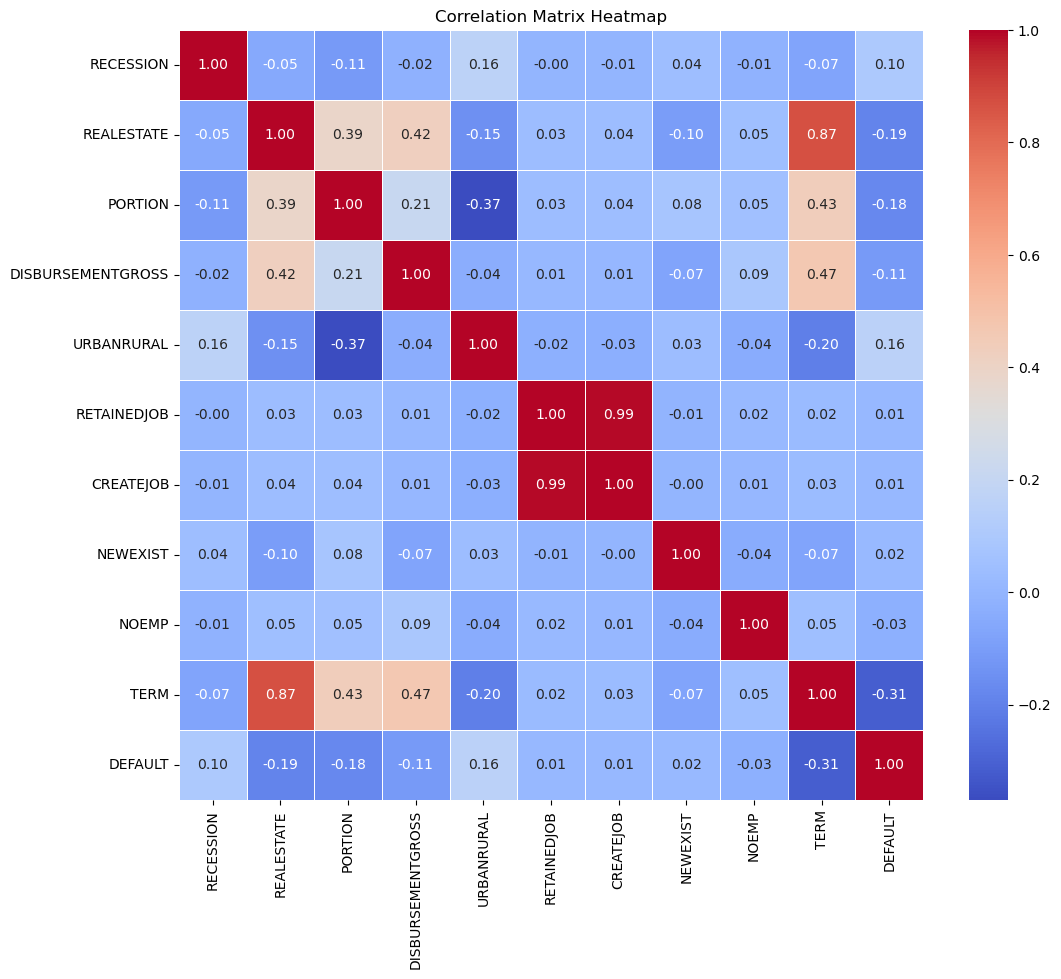

In [33]:
# Compute the correlation matrix for the selected columns in the subset DataFrame ('subset_df')
correlation_matrix = subset_df.corr()
# Display the correlation matrix
correlation_matrix
# Set up the visualization: create a heatmap of the correlation matrix using Seaborn and Matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Add title and display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


# Logistic Regression

In [34]:
# Assuming subset_df is your DataFrame
# Drop any rows with missing values
subset_df = subset_df.dropna()

# Select features (independent variables) by excluding 'DEFAULT'
X = subset_df.drop(columns=['DEFAULT'])

# Select the target variable
y = subset_df['DEFAULT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.8341212171831064

Confusion Matrix:
[[143681   4189]
 [ 25602   6123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91    147870
           1       0.59      0.19      0.29     31725

    accuracy                           0.83    179595
   macro avg       0.72      0.58      0.60    179595
weighted avg       0.80      0.83      0.80    179595



# Random Forest Classifier

In [35]:
# Assuming subset_df is your DataFrame
# Drop any rows with missing values
subset_df = subset_df.dropna()

# Select features (independent variables) by excluding 'DEFAULT'
X = subset_df.drop(columns=['DEFAULT'])

# Select the target variable
y = subset_df['DEFAULT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.926646064756814

Confusion Matrix:
[[142476   5394]
 [  7780  23945]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96    147870
           1       0.82      0.75      0.78     31725

    accuracy                           0.93    179595
   macro avg       0.88      0.86      0.87    179595
weighted avg       0.92      0.93      0.93    179595



# CONCLUSION

Exploratory Data Analysis revealed key insights into the behavior of loan customers, shedding light on patterns of loan repayment and charge-offs.

The distribution of loan applications across various sectors provides insights into the demand and popularity of loans within each sector. This information can be valuable for strategic decision-making.

Through thorough analysis, certain variables were identified as strong predictors of loan default.

The random forest model outperforms logistic regression in terms of precision, recall, and F1-score. Random forest achieves higher precision, recall, and F1-score for identifying risky instances.

The Random Forest model emerged as the most effective predictive tool, showcasing its ability to discern whether a customer is likely to repay or face charge-offs.

Leveraging the RF model in lending decisions empowers financial institutions to make more informed choices, assessing the creditworthiness of applicants based on historical repayment data and contributing to prudent and data-driven lending practices.

The application of data-driven models supports the overall financial stability of the institution. Informed lending decisions based on predictive analytics enhance risk management, safeguarding the institution against potential defaults.
